In [1]:
%load_ext autoreload
%autoreload 2

import logging
import os

import numpy as np

import emgkit
from load_synthetic_signal import load_synthetic_signal

logging.basicConfig(level=logging.INFO)

SEED = 42
DATA_PATH = os.path.join("data", "synthetic_signals")
MVC = 10
SNR = 10

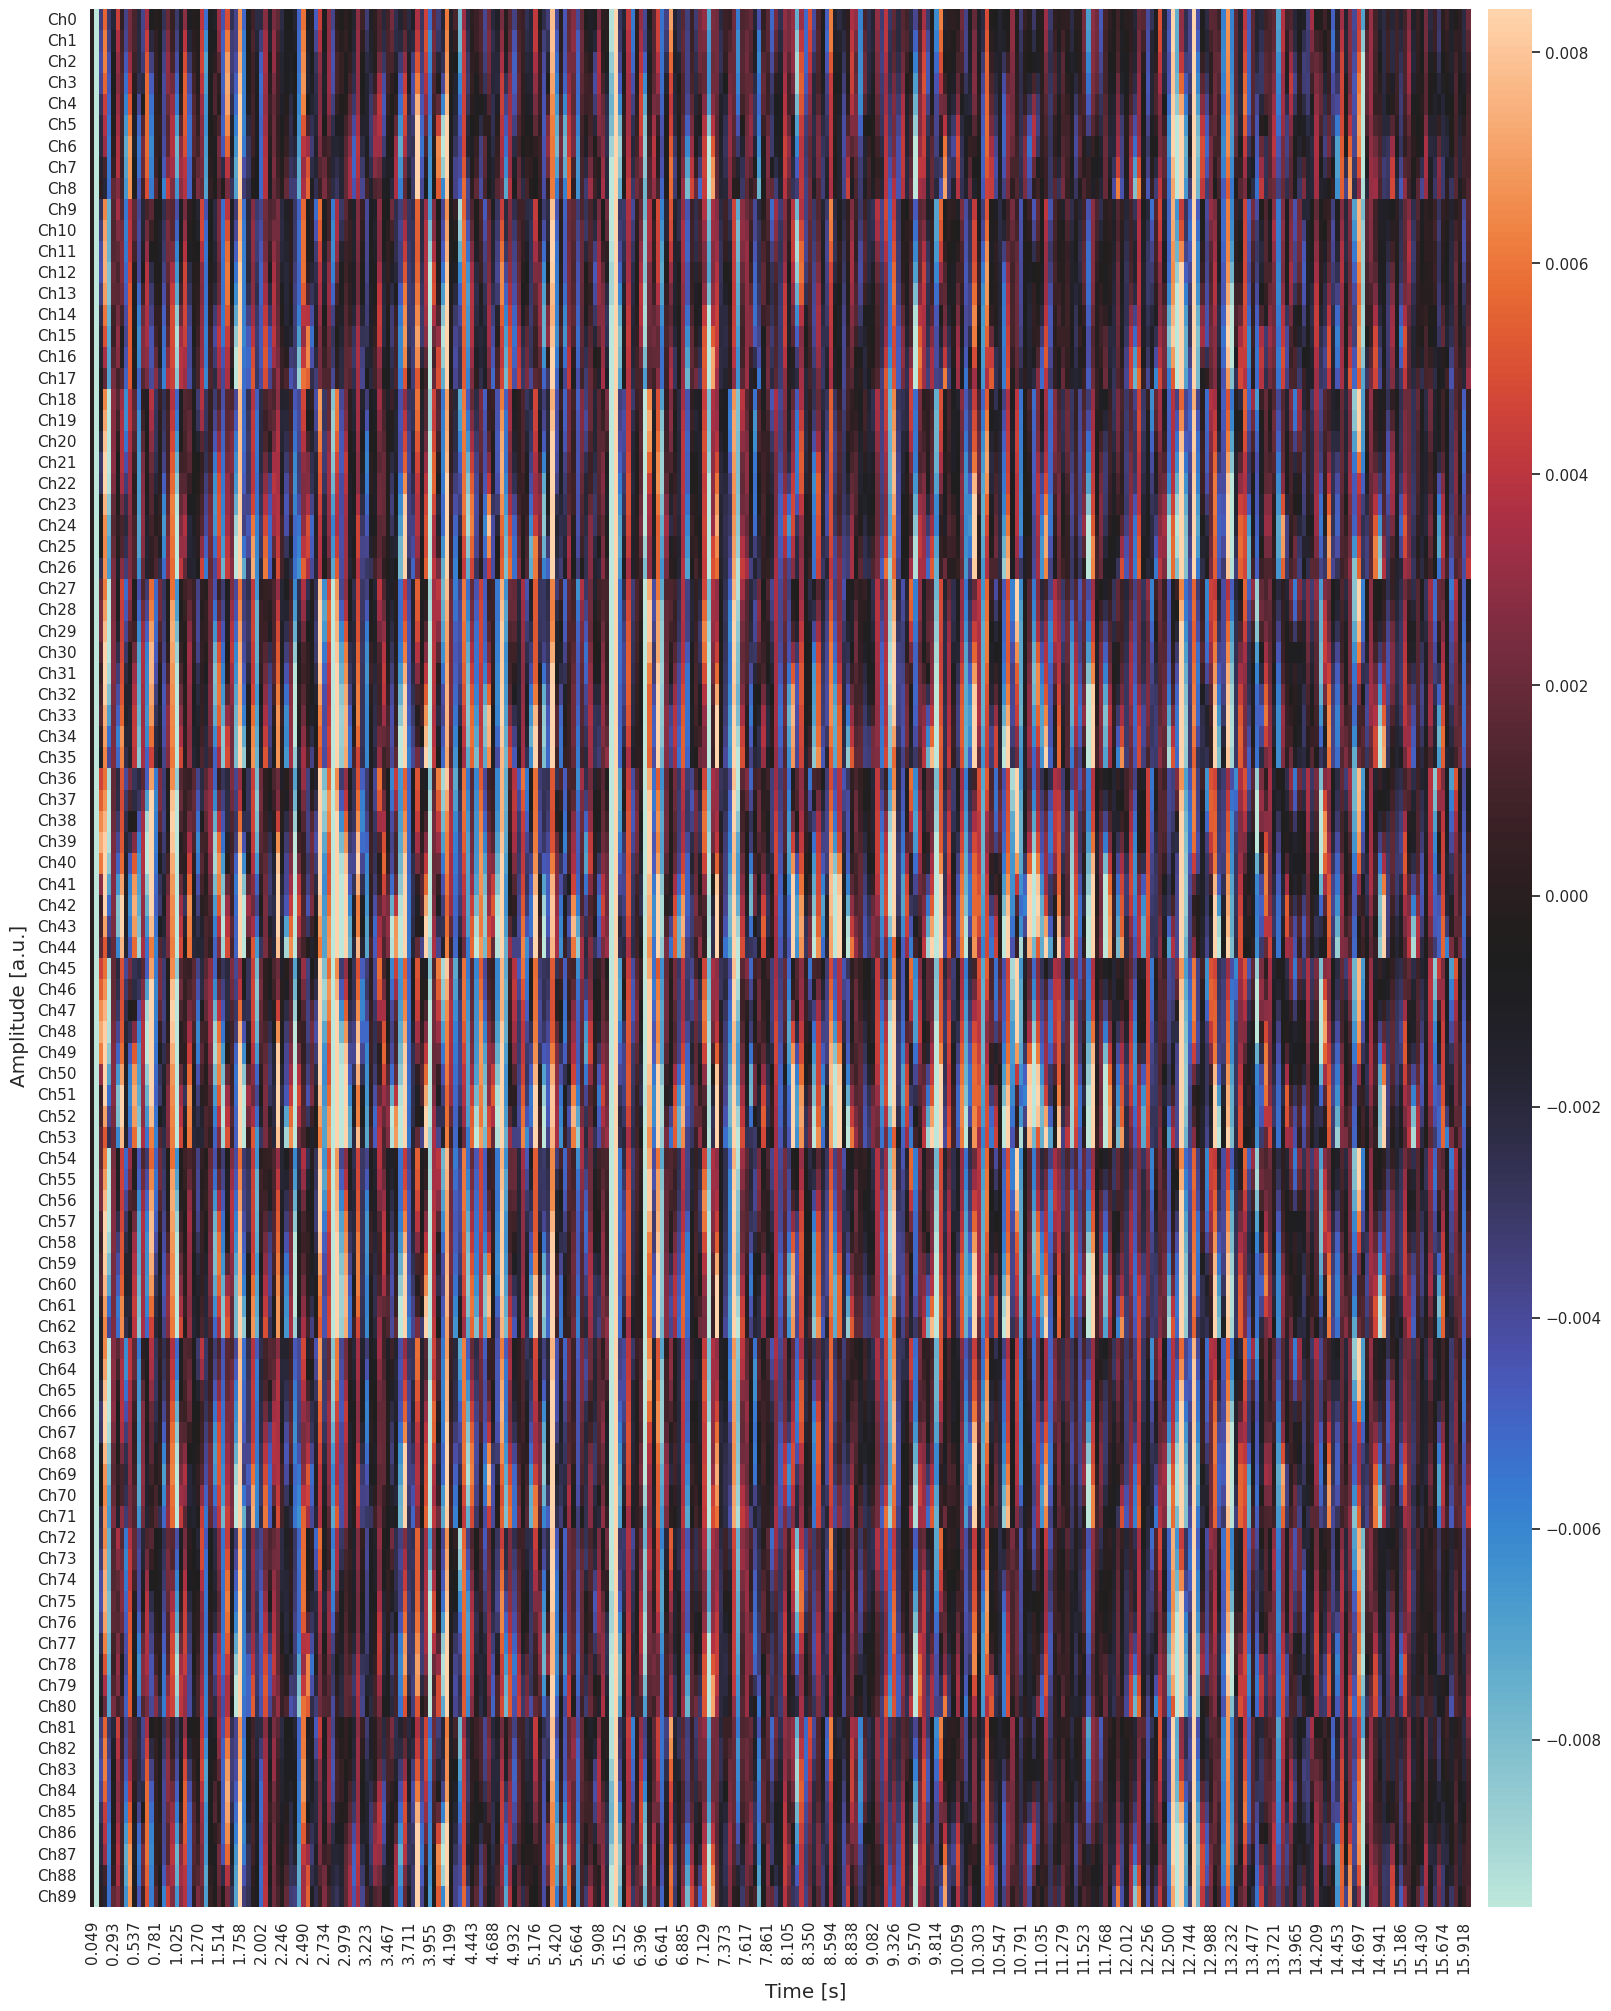

In [2]:
samples = load_synthetic_signal(DATA_PATH, mvc=MVC, apply_filter=False)
emg, gt_spikes_t, fs = samples[0]

emgkit.plot.plot_signal(emg, fs, style="compact", fig_size=(16, 20), resolution=200)

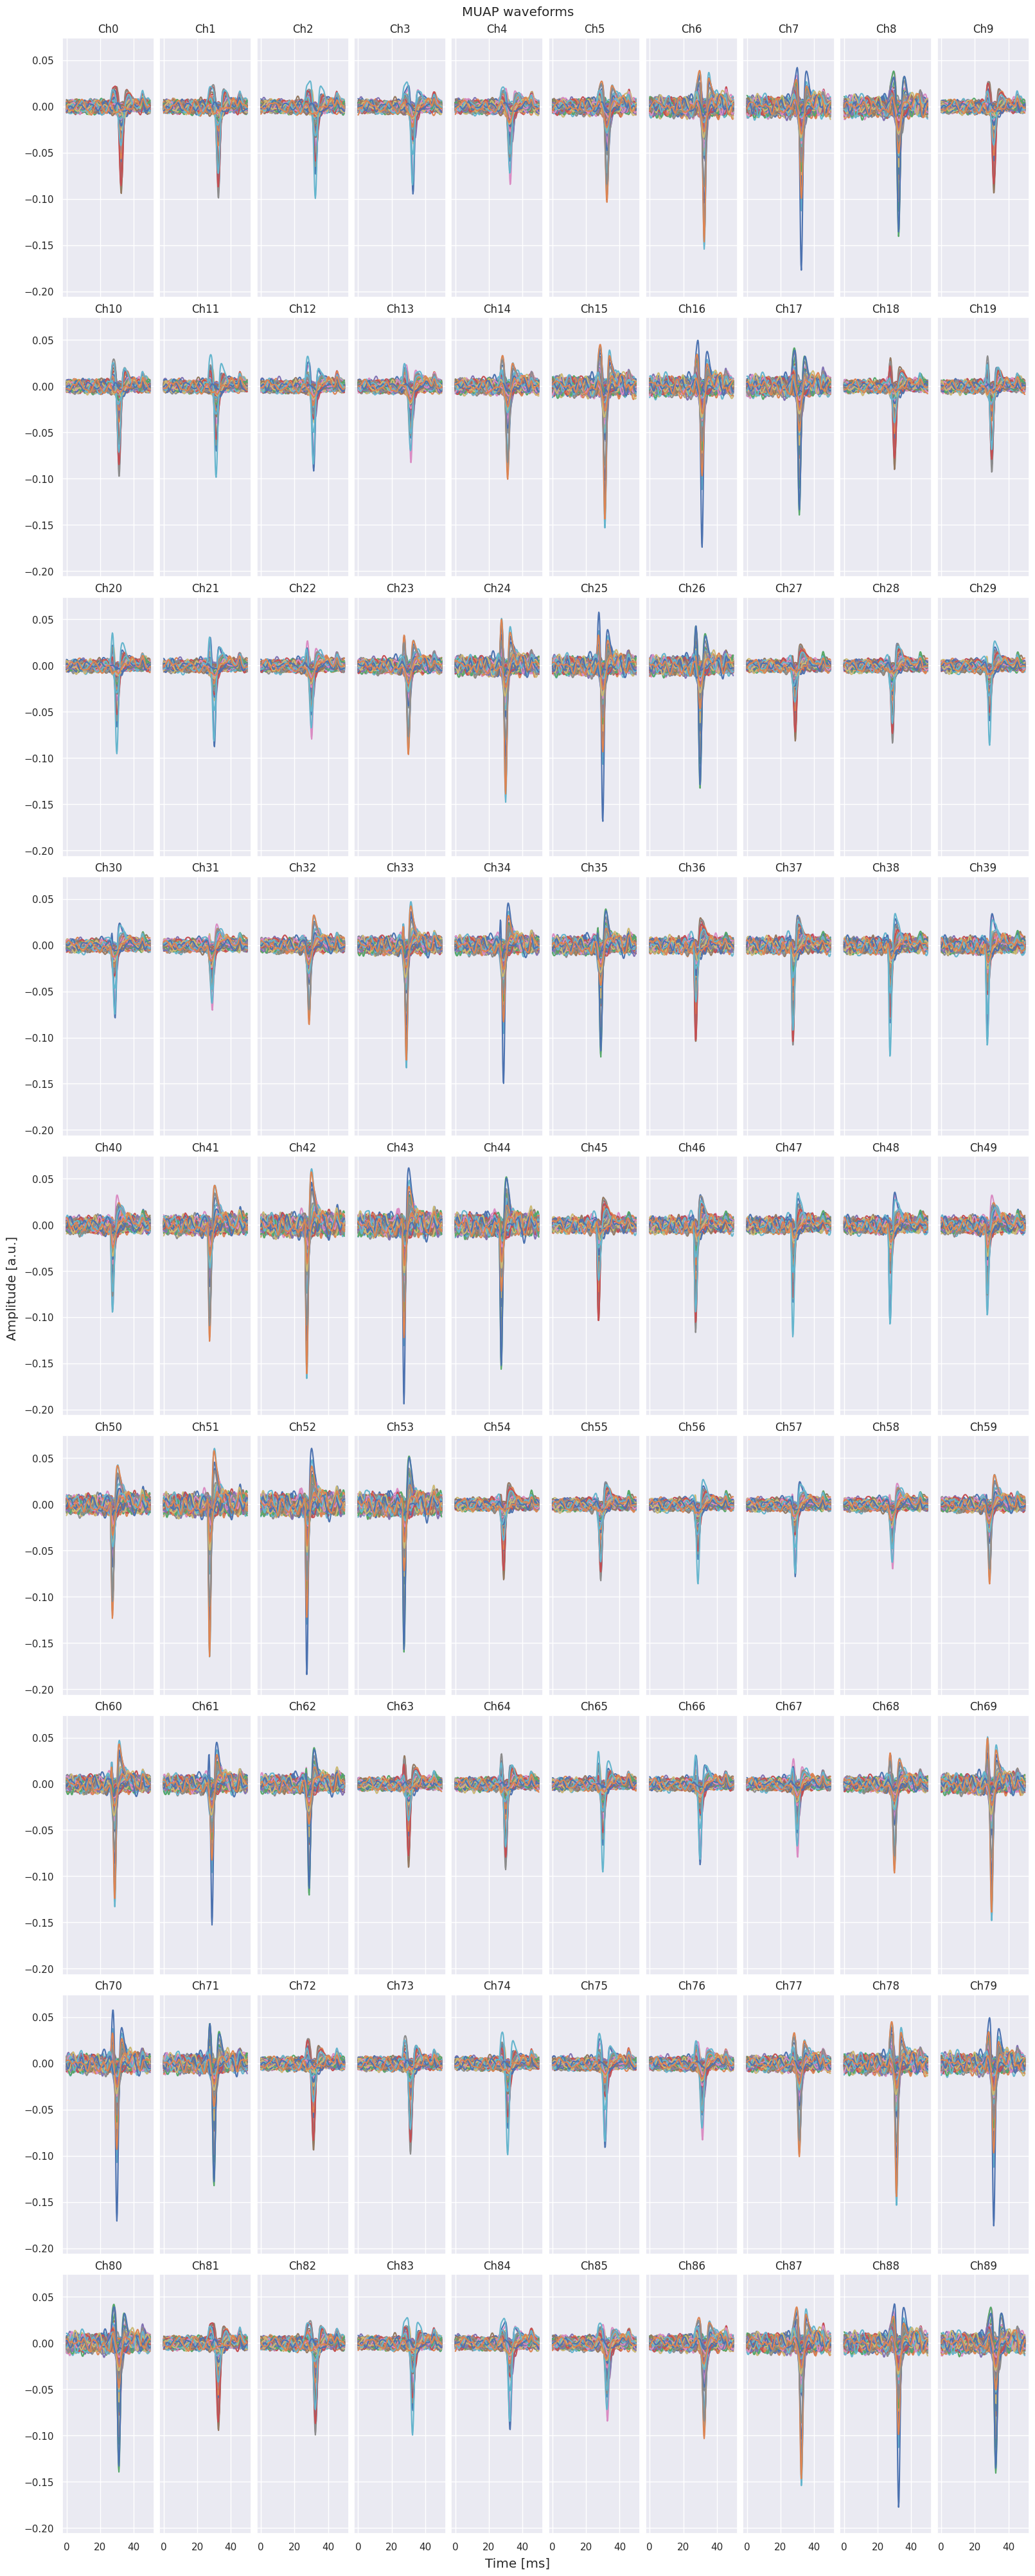

In [20]:
wfs = emgkit.utils.compute_waveforms(
    emg, gt_spikes_t, wf_radius_ms=25.0, fs=fs
)

emgkit.plot.plot_waveforms(wfs, fs=fs, fig_size=(16, 40))

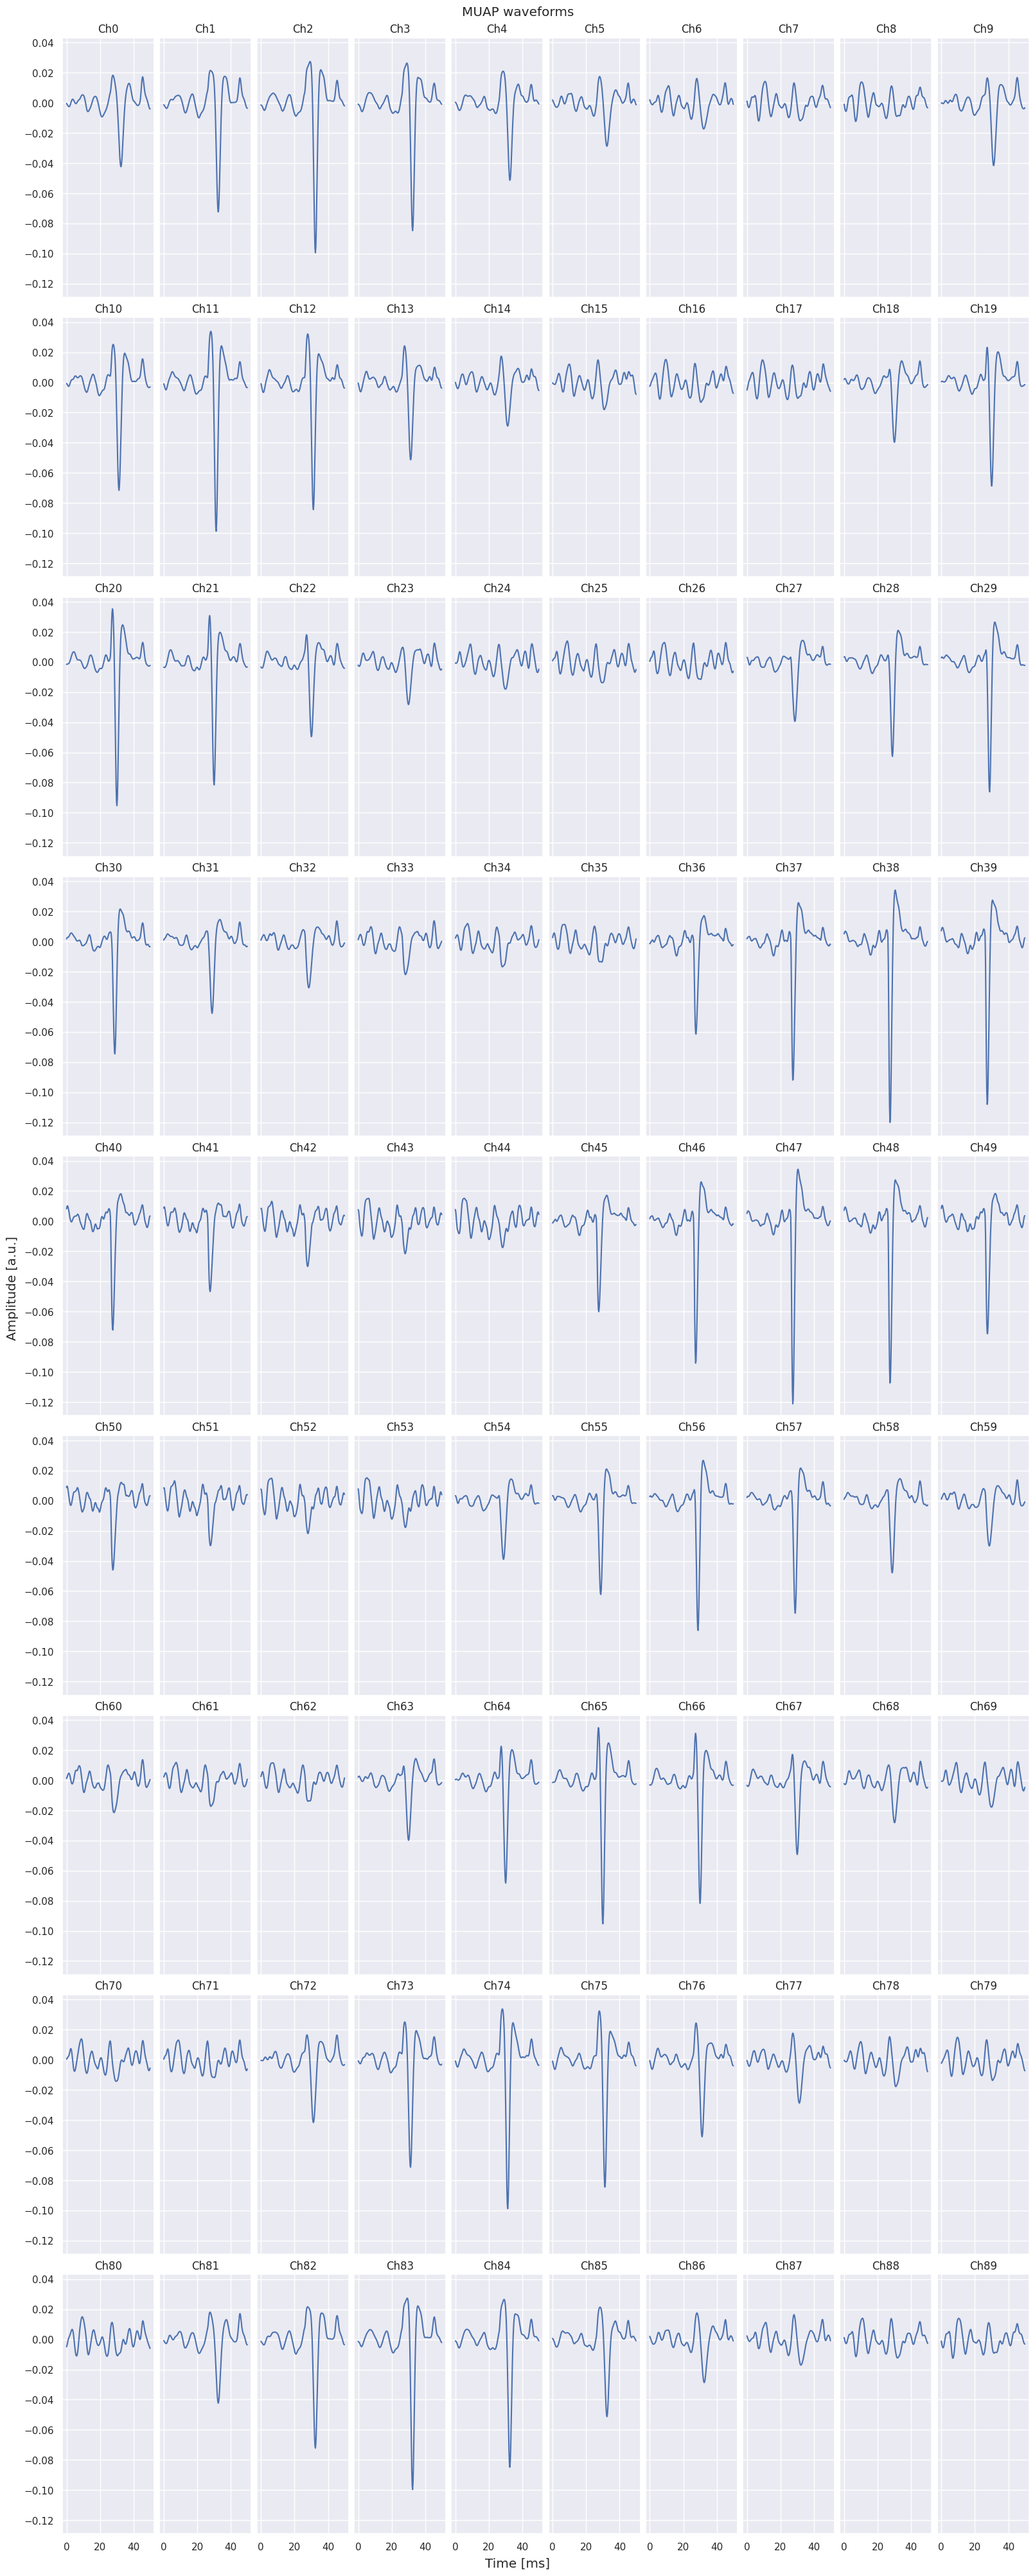

In [21]:
wf259_raw = wfs[:, 259].reshape(90, 1, -1)

emgkit.plot.plot_waveforms(wf259_raw, fs=fs, fig_size=(16, 40))

In [22]:
def stretch_wf(wf, gamma) -> np.ndarray:
    t = np.arange(wf.shape[-1]) / fs
    return np.interp(t / gamma, t, wf) / gamma

wf259_1 = np.zeros_like(wf259_raw)
wf259_2 = np.zeros_like(wf259_raw)
for i in range(wf259_raw.shape[0]):
    wf259_1[i, 0] = stretch_wf(wf259_raw[i, 0], 1.1)
    wf259_2[i, 0] = stretch_wf(wf259_raw[i, 0], 1.2)

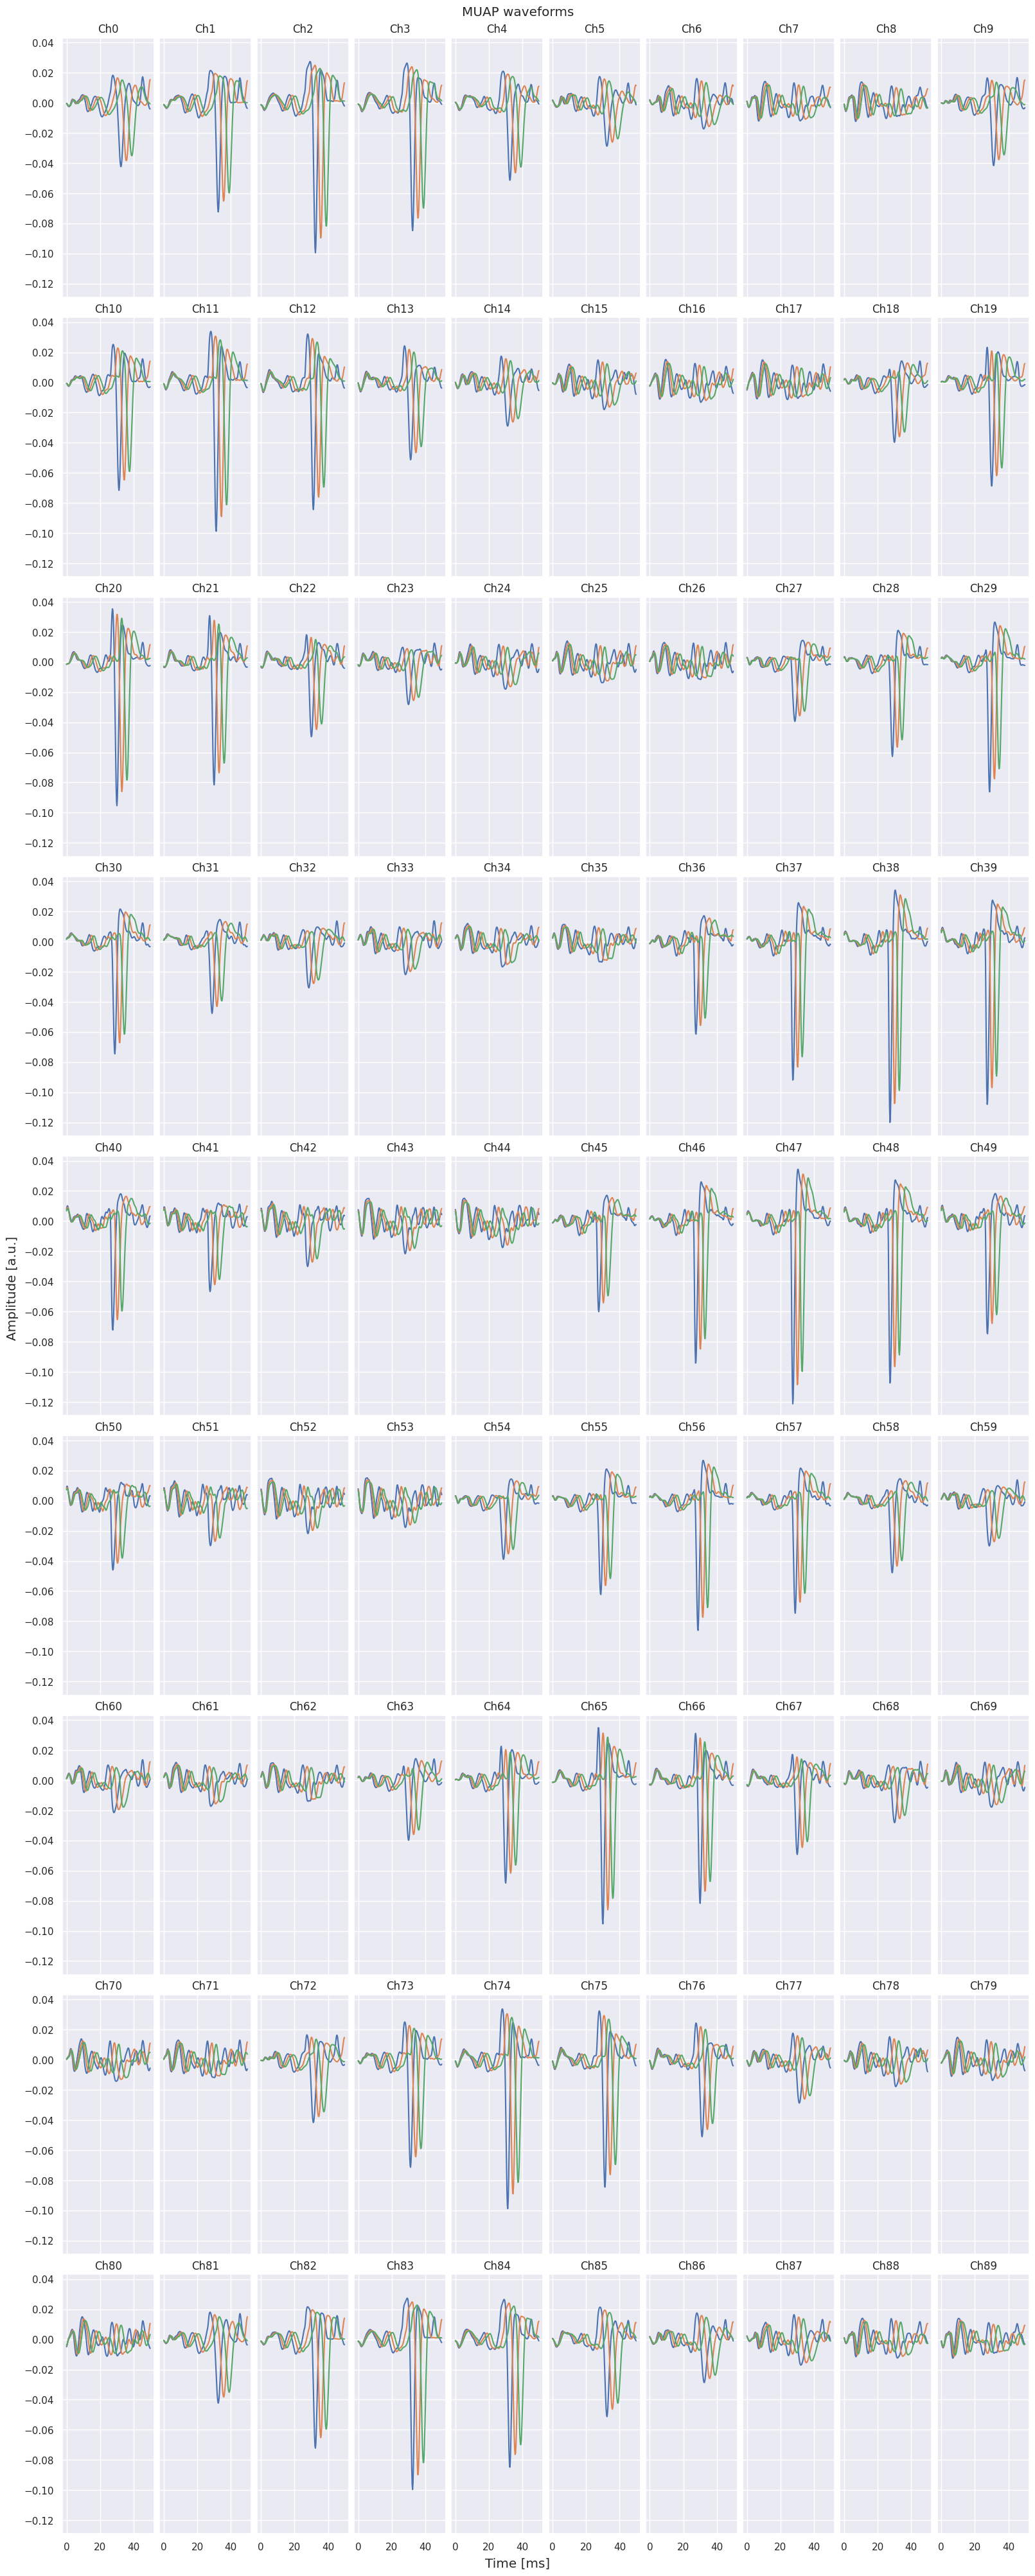

In [23]:
wf259 = np.concatenate((wf259_raw, wf259_1, wf259_2), axis=1)

emgkit.plot.plot_waveforms(wf259, fs=fs, fig_size=(16, 40))

In [ ]:
emg_rec = np.zeros_like(emg)

gt_spikes_bin = emgkit.utils.sparse_to_dense(gt_spikes_t, emg.shape[0] / fs, fs)

for i in range(wfs.shape[0]):  # channels
    for j in range(wfs.shape[1]):  # MUs
        emg_rec[:, i] += np.convolve(gt_spikes_bin[f"MU{j}"], wfs[i, j], "same")